In [1]:
from sympy import *
import numpy as np

In [2]:
x = [1, 2, 3]
y = [4, 5, 6]
cross = np.cross(x, y)   # cross product
cross2 = np.cross(y,x)

In [3]:
cross, cross2

(array([-3,  6, -3]), array([ 3, -6,  3]))

In [4]:
np.cross(x,x), np.cross(y,y)

(array([0, 0, 0]), array([0, 0, 0]))

In [5]:
x @ cross , y@cross  #cross product in perpendicular to both x and y

(0, 0)

Text(0.5, 0, '$z$')

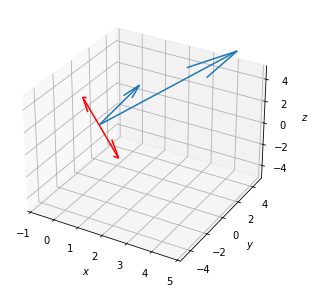

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
ax =  plt.axes(projection ='3d')
ax.set_xlim([-1,5])
ax.set_ylim([-5,5])
ax.set_zlim([-5,5])

start = [0,0,0]

ax.quiver(start[0],start[1],start[2],x[0],x[1],x[2],)
ax.quiver(start[0],start[1],start[2],y[0],y[1],y[2])
ax.quiver(start[0],start[1],start[2],cross[0],cross[1],cross[2], color='red')
ax.quiver(start[0],start[1],start[2],cross2[0],cross2[1],cross2[2], color='red')
plt.xlabel('$x$')
plt.ylabel('$y$')
ax.set_zlabel('$z$')

In [7]:
area = np.linalg.norm(cross)
area

7.3484692283495345

In [8]:
np.sqrt(sum(cross**2))

7.3484692283495345

In [9]:
a = np.array([1,9,0])
b = np.array([2,8,5])

c = np.cross(a,b)
c

array([ 45,  -5, -10])

In [10]:
print(np.dot(a,c))
print(b.dot(c))   #vector c in perpendicular to both a and b

0
0


# Matrices

In [11]:
A = Matrix([[2,3,3],[2,4,5],[1,1,2]])
A

Matrix([
[2, 3, 3],
[2, 4, 5],
[1, 1, 2]])

In [12]:
var('x1 x2 x3')

(x1, x2, x3)

In [13]:
x = Matrix([x1,x2,x3])
x

Matrix([
[x1],
[x2],
[x3]])

In [14]:
A @ x

Matrix([
[2*x1 + 3*x2 + 3*x3],
[2*x1 + 4*x2 + 5*x3],
[    x1 + x2 + 2*x3]])

In [15]:
A[0,:] @ x, A[1,:] @ x, A[2,:]@x

(Matrix([[2*x1 + 3*x2 + 3*x3]]),
 Matrix([[2*x1 + 4*x2 + 5*x3]]),
 Matrix([[x1 + x2 + 2*x3]]))

In [16]:
np.concatenate([A[0,:] @ x, A[1,:] @ x, A[2,:]@x], axis=0)

array([[2*x1 + 3*x2 + 3*x3],
       [2*x1 + 4*x2 + 5*x3],
       [x1 + x2 + 2*x3]], dtype=object)

In [17]:
np.vstack([A[0,:] @ x, A[1,:] @ x, A[2,:]@x])

array([[2*x1 + 3*x2 + 3*x3],
       [2*x1 + 4*x2 + 5*x3],
       [x1 + x2 + 2*x3]], dtype=object)

In [18]:
# Example

A = np.array([[4,5,1],[3,9,4],[5,7,9]])
B = np.array([[0,0,8],[8,0,4],[7,7,9]])
x = np.array([7,5,1])

In [20]:
(A@B)@x

array([ 425,  936, 1297])

In [21]:
A@(B@x)

array([ 425,  936, 1297])

In [22]:
A@B

array([[ 47,   7,  61],
       [100,  28,  96],
       [119,  63, 149]])

In [23]:
B@A

array([[ 40,  56,  72],
       [ 52,  68,  44],
       [ 94, 161, 116]])

In [24]:
A@B == B@A

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

#### The identity matrix

In [31]:
I = np.identity((3))
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [32]:
A@I

array([[4., 5., 1.],
       [3., 9., 4.],
       [5., 7., 9.]])

In [33]:
I@A

array([[4., 5., 1.],
       [3., 9., 4.],
       [5., 7., 9.]])

In [34]:
I @ x

array([7., 5., 1.])

##### The rotation matrix

In [84]:
R = np.array([[0,-1],[1,0]])
R

array([[ 0, -1],
       [ 1,  0]])

[-1  1]


(-2.0, 2.0)

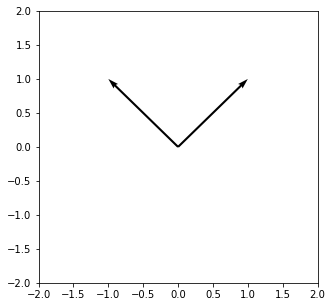

In [114]:
plt.figure(figsize=(5,5))

start = [0,0]
x = np.array([1,1])

R_x = R@x
print(R_x)

plt.quiver(0,0,x[0],x[1], scale_units='xy', angles='xy', scale=1)
plt.quiver(0,0,R_x[0],R_x[1], scale_units='xy', angles='xy', scale=1)


plt.xlim(-2,2)
plt.ylim(-2,2)

In [115]:
R @ R

array([[-1,  0],
       [ 0, -1]])

In [117]:
R @ R @ R @R

array([[1, 0],
       [0, 1]])

### Inverse matrix

In [119]:
A = np.array([[2,3,3],[2,4,5],[1,1,2]])
A

array([[2, 3, 3],
       [2, 4, 5],
       [1, 1, 2]])

In [121]:
np.linalg.det(A)

2.9999999999999996

In [132]:
adj = np.linalg.inv(A) * np.linalg.det(A)  # the adjoint matrix
adj

array([[ 3., -3.,  3.],
       [ 1.,  1., -4.],
       [-2.,  1.,  2.]])